In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import sqlite3


con = sqlite3.connect('./illust_vector.db')
df = pd.io.sql.read_sql_query('select * from {table}'.format(table='DataSet_008'), con)
image_id = df['image_id']
df = df.drop('id', axis=1)
df = df.drop('image_id', axis=1)

In [14]:
df_array = df.as_matrix()
pred = KMeans(n_clusters=16).fit_predict(df_array)

In [15]:
df["cluster"] = pred
df["image_id"] = image_id
print(df["cluster"].value_counts())

8     218
3     209
9     208
0     205
12    190
15    174
7     171
2     171
10    131
5     105
13     57
6      38
11     32
4      24
1      20
14     18
Name: cluster, dtype: int64


In [16]:
result = df.ix[:, ["image_id", "cluster"]]

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1971
[t-SNE] Computed conditional probabilities for sample 1971 / 1971
[t-SNE] Mean sigma: 21.722843
[t-SNE] Iteration 25: error = 1.1563059, gradient norm = 0.0063169
[t-SNE] Iteration 50: error = 0.9597717, gradient norm = 0.0050306
[t-SNE] Iteration 75: error = 0.5281827, gradient norm = 0.0026641
[t-SNE] Iteration 100: error = 0.4804801, gradient norm = 0.0024892
[t-SNE] Error after 100 iterations with early exaggeration: 0.480480
[t-SNE] Iteration 125: error = 0.4095265, gradient norm = 0.0024543
[t-SNE] Iteration 150: error = 0.3889771, gradient norm = 0.0025644
[t-SNE] Iteration 175: error = 0.3831691, gradient norm = 0.0027261
[t-SNE] Iteration 200: error = 0.3859372, gradient norm = 0.0020981
[t-SNE] Iteration 225: error = 0.3854574, gradient norm = 0.0023978
[t-SNE] Iteration 225: did not make any progress during the last 30 episodes.

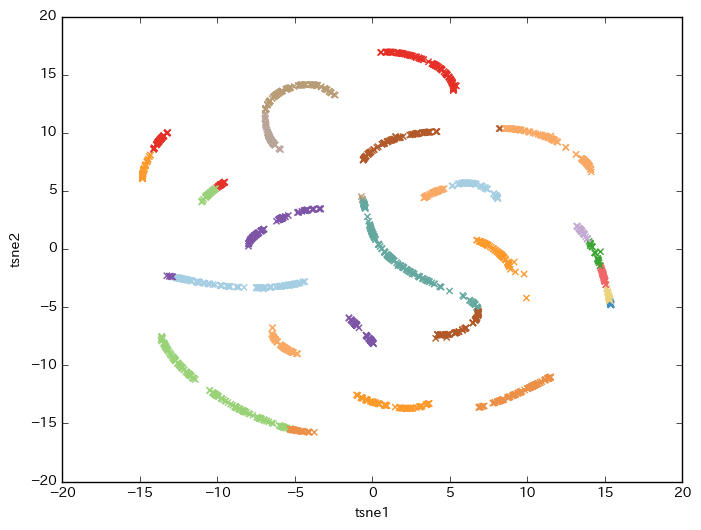

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
model = TSNE(n_components=2, perplexity=60, n_iter=600, verbose=4, random_state=1)

X = model.fit_transform(df_array)


plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Paired, marker='x')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [138]:
result[result["cluster"] == 10]

,image_id,cluster
19,808015,10
20,809153,10
21,809267,10
22,810404,10
23,810407,10
24,811531,10
25,811608,10
26,812105,10
27,812106,10
28,812359,10
